In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config 
import mysql.connector
import requests
db_name = 'City_Energy_Data'
%matplotlib inline

In [5]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = db_name
)
cur = cnx.cursor()


In [3]:
cnx.close()

In [25]:
stmt = """
SELECT p.city, p.state, p.population, r.housing_units, r.elec_mwh, r.elec_lb_ghg
FROM population_data AS p
INNER JOIN residential_energy_A AS r ON p.city_id=r.city_id
WHERE p.state = 'NY';
"""
cur.execute(stmt)
rdf = pd.DataFrame(cur.fetchall())
rdf.columns = [x[0] for x in cur.description]

In [27]:
rdf['population'] = rdf['population'].apply(lambda x: x.replace(',', ''))
rdf['population'] = rdf['population'].astype(int)
rdf['people_per_building'] = rdf['population'] / rdf['housing_units']
rdf['elec_per_person'] = rdf['elec_mwh'] / rdf['population']
rdf['emissions_per_person'] = rdf['elec_lb_ghg'] / rdf['population']

In [36]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
city                    100 non-null object
state                   100 non-null object
population              100 non-null int64
housing_units           98 non-null float64
elec_mwh                98 non-null float64
elec_lb_ghg             98 non-null float64
people_per_building     98 non-null float64
elec_per_person         98 non-null float64
emissions_per_person    98 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.1+ KB


/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequen

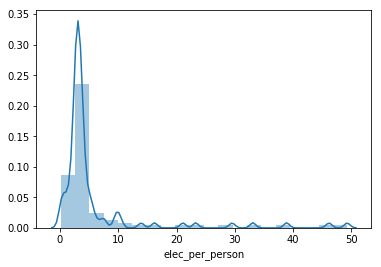

In [38]:
sns.distplot(rdf['elec_per_person'], bins=20)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


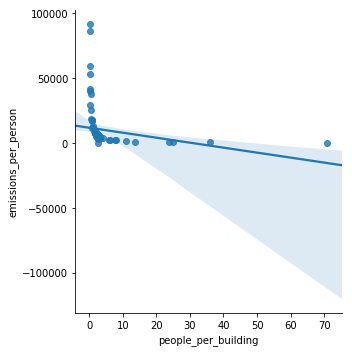

In [45]:
sns.lmplot(x='people_per_building', y='emissions_per_person', data=rdf)